In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

df = pd.read_excel (r'with id for q.xlsx')
df.shape

(3664, 6)

In [2]:
df.head()

,question,country+gender,tag,DR spec,answer,new_id
0,['\nالسلام عليكم ورحمه الله وبركاته\nهل الحزام...,\nذكر من السعودية,NaN,\n,\nإن المسبب للحزام الناري هو فيروس نطاقي حماقي...,865
1,['\nماهي اعمار الاطفال الذين يمكن إعطائهم فلاج...,\nأنثى من العراق,NaN,\n,\nينتمي دواء معلق فلاجيل الذي يحتوي على المادة...,2084
2,['\nانا باستخدم فنستيل نقط لبنتي 6شهور كل اما ...,\nذكر من مصر,NaN,\n,\nيحتوي دواء فنستيل على المادة الفعالة ديميتين...,1057
3,['\nهل تحاليل البراز\nتخرب اذا جلست عندي لمدة ...,\nأنثى من السعودية,NaN,\nطب عام,\nيوجد تعليمات خاصة لجمع وحفظ عينة البراز وذلك...,2241
4,['\nاريد اسم دواء منوم للاطفال بعمر السنه دون ...,\nذكر من الاردن,"[' منوم للاطفال', ' منوم للاطفال\n دواء منوم ل...",\n,\nلا ينصح باستخدام أي دواء منوم للأطفال بعمر ا...,575


In [3]:
tok = df['country+gender'].apply(lambda x: x.split())

In [4]:
#print(tok)
l=[]
for i in tok:
    l.append(i)

In [5]:
len(l)

3664

In [6]:
import pandas as pd

In [7]:
t=pd.DataFrame(l,columns=["A","B","C","D"])

In [8]:
t["C"].unique()

array(['السعودية', 'العراق', 'مصر', 'الاردن', 'المغرب', 'ليبيا', 'الكويت',
       'الجزائر', 'اليمن', None, 'السودان', 'سوريا', 'بلغاريا',
       'الامارات', 'قطر', 'سلطنة', 'نيوزيلندا', 'الولايات', 'ملاوي',
       'لبنان', 'بريطانيا', 'تركيا', 'اليونان', 'ماليزيا', 'فلسطين',
       'الصين', 'استراليا', 'المانيا', 'البحرين', 'الدانمرك', 'هولندا',
       'كندا', 'موريتانيا', 'الصومال', 'تونس', 'بلجيكا', 'بوروندي',
       'النرويج', 'ايطاليا', 'سورينام', 'النمسا', 'الصحراء', 'ايران',
       'السويد', 'البرازيل', 'عمان', 'فنزويلا', 'فرنسا', 'جيبوتي',
       'سويسرا', 'قبرص', 'اسبانيا', 'نيجيريا', 'روسيا', 'الهند'],
      dtype=object)

In [9]:
len(t["C"].unique())

55

In [10]:
t[t['C']=="سلطنة"]

,A,B,C,D
201,ذكر,من,سلطنة,عمان
268,أنثى,من,سلطنة,عمان
294,ذكر,من,سلطنة,عمان
295,ذكر,من,سلطنة,عمان
479,ذكر,من,سلطنة,عمان
...,...,...,...,...
3415,أنثى,من,سلطنة,عمان
3416,أنثى,من,سلطنة,عمان
3417,أنثى,من,سلطنة,عمان
3472,ذكر,من,سلطنة,عمان


In [11]:
t['C'].fillna(t['B'],inplace=True)

In [12]:
#t['C'].dropna(inplace=True);


In [13]:
#t['C'].isna().sum()

In [14]:
t['C'].replace(to_replace="سلطنة", value='عمان', inplace=True)

In [15]:
#t[t['C'] != ["ليبيا","الاردن","العراق","الجزائر","مصر","السعودية"]]


In [16]:
#["ليبيا","الاردن","العراق","الجزائر","مصر","السعودية"]


In [17]:
others=t.loc[(t['C'] !='السعودية')
               &(t['C'] !='مصر')
               &(t['C']!='الجزائر')
               &(t['C'] !='العراق')
             &(t['C'] !='الاردن')
              &(t['C'] !='ليبيا'), 'C'].unique().tolist()

print(others)

['المغرب', 'الكويت', 'اليمن', 'السودان', 'سوريا', 'بلغاريا', 'الامارات', 'معروف', 'قطر', 'عمان', 'نيوزيلندا', 'الولايات', 'ملاوي', 'لبنان', 'بريطانيا', 'تركيا', 'اليونان', 'ماليزيا', 'فلسطين', 'الصين', 'استراليا', 'المانيا', 'البحرين', 'الدانمرك', 'هولندا', 'كندا', 'موريتانيا', 'الصومال', 'تونس', 'بلجيكا', 'بوروندي', 'النرويج', 'ايطاليا', 'سورينام', 'النمسا', 'الصحراء', 'ايران', 'السويد', 'البرازيل', 'فنزويلا', 'فرنسا', 'جيبوتي', 'سويسرا', 'قبرص', 'اسبانيا', 'نيجيريا', 'روسيا', 'الهند']


In [18]:
t['C'].replace(to_replace=others,value="other",inplace=True)

In [19]:
t['C']

0       السعودية
1         العراق
2            مصر
3       السعودية
4         الاردن
          ...   
3659       other
3660       other
3661       other
3662       other
3663       other
Name: C, Length: 3664, dtype: object

In [20]:
import arabic_reshaper
from bidi.algorithm import get_display

x=[]
for items in t['C'].values:
    x.append(get_display(arabic_reshaper.reshape(items)))


x

tt=pd.DataFrame(x,columns=["A"])
#plt.figure(figsize=(10, 7))
#t['C'].value_counts().plot(kind='bar')

In [21]:
tt

,A
0,ﺔﻳﺩﻮﻌﺴﻟﺍ
1,ﻕﺍﺮﻌﻟﺍ
2,ﺮﺼﻣ
3,ﺔﻳﺩﻮﻌﺴﻟﺍ
4,ﻥﺩﺭﻻﺍ
...,...
3659,other
3660,other
3661,other
3662,other


In [50]:
np.unique(x)

array(['other', 'ﺎﻴﺒﻴﻟ', 'ﺔﻳﺩﻮﻌﺴﻟﺍ', 'ﺮﺋﺍﺰﺠﻟﺍ', 'ﺮﺼﻣ', 'ﻕﺍﺮﻌﻟﺍ', 'ﻥﺩﺭﻻﺍ'],
      dtype='<U8')

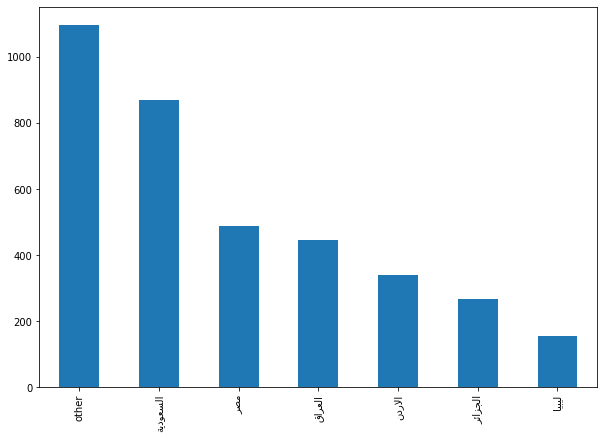

In [22]:
plt.figure(figsize=(10, 7))
tt['A'].value_counts().plot(kind='bar')


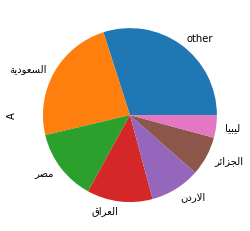

In [23]:
tt['A'].value_counts().plot(kind='pie')

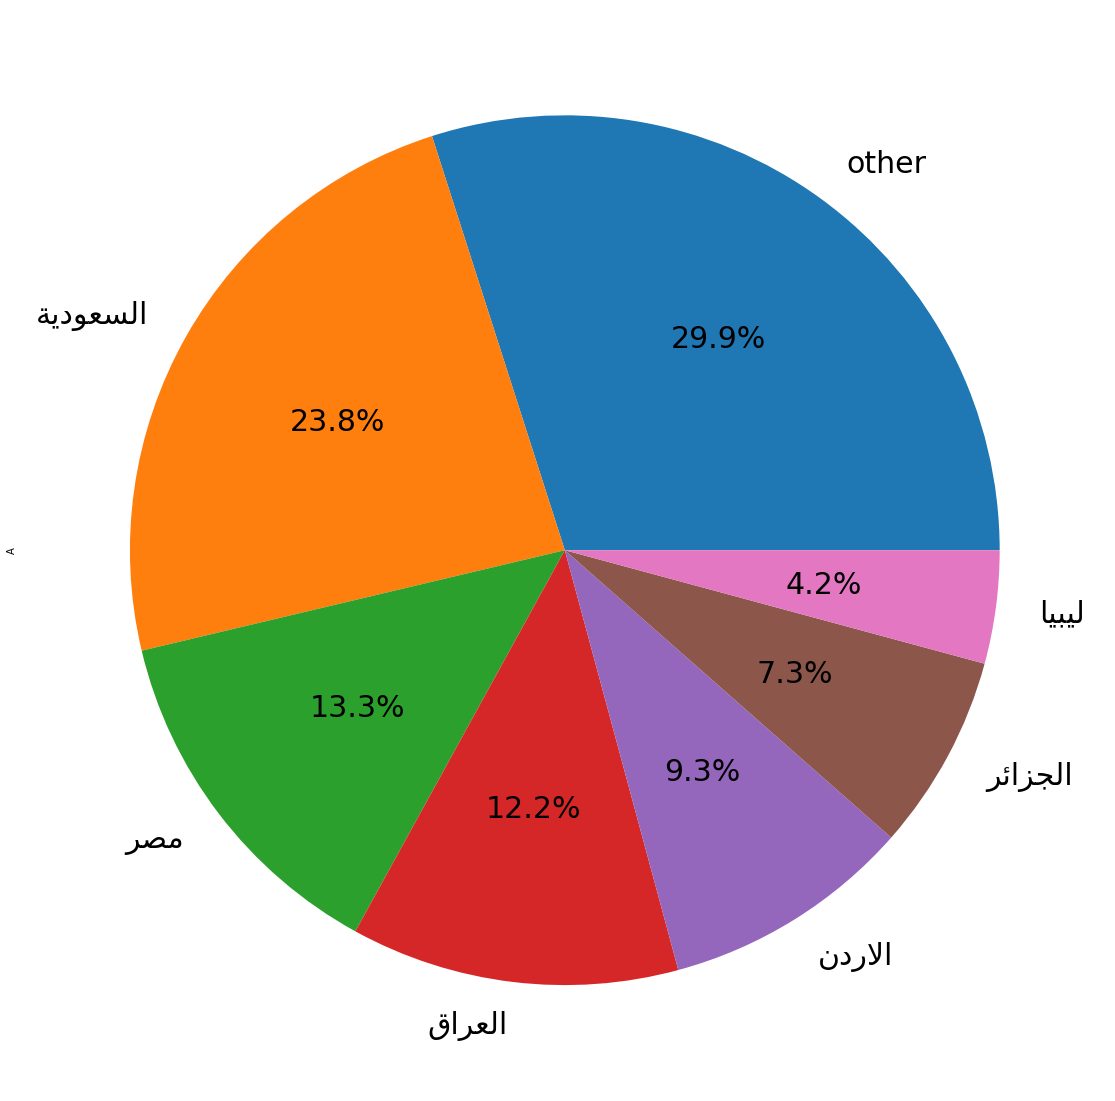

In [76]:
ax = (tt['A'].value_counts()*100.0 /len(tt['A']))\
.plot.pie(autopct='%.1f%%',figsize =(20,20),fontsize=30) 

In [25]:
t

,A,B,C,D
0,ذكر,من,السعودية,None
1,أنثى,من,العراق,None
2,ذكر,من,مصر,None
3,أنثى,من,السعودية,None
4,ذكر,من,الاردن,None
...,...,...,...,...
3659,أنثى,من,other,None
3660,ذكر,من,other,None
3661,أنثى,من,other,None
3662,ذكر,من,other,None


In [31]:
t['A'].replace(to_replace=['من',"غير"],value="غير معروف",inplace=True)

In [42]:
import arabic_reshaper
from bidi.algorithm import get_display

y=[]
for items in t['A'].values:
    y.append(get_display(arabic_reshaper.reshape(items)))


y

ty=pd.DataFrame(y,columns=["A"])
#plt.figure(figsize=(10, 7))
#t['C'].value_counts().plot(kind='bar')

In [49]:
np.unique(y)

array(['ﺮﻛﺫ', 'ﻑﻭﺮﻌﻣ ﺮﻴﻏ', 'ﻰﺜﻧﺃ'], dtype='<U9')

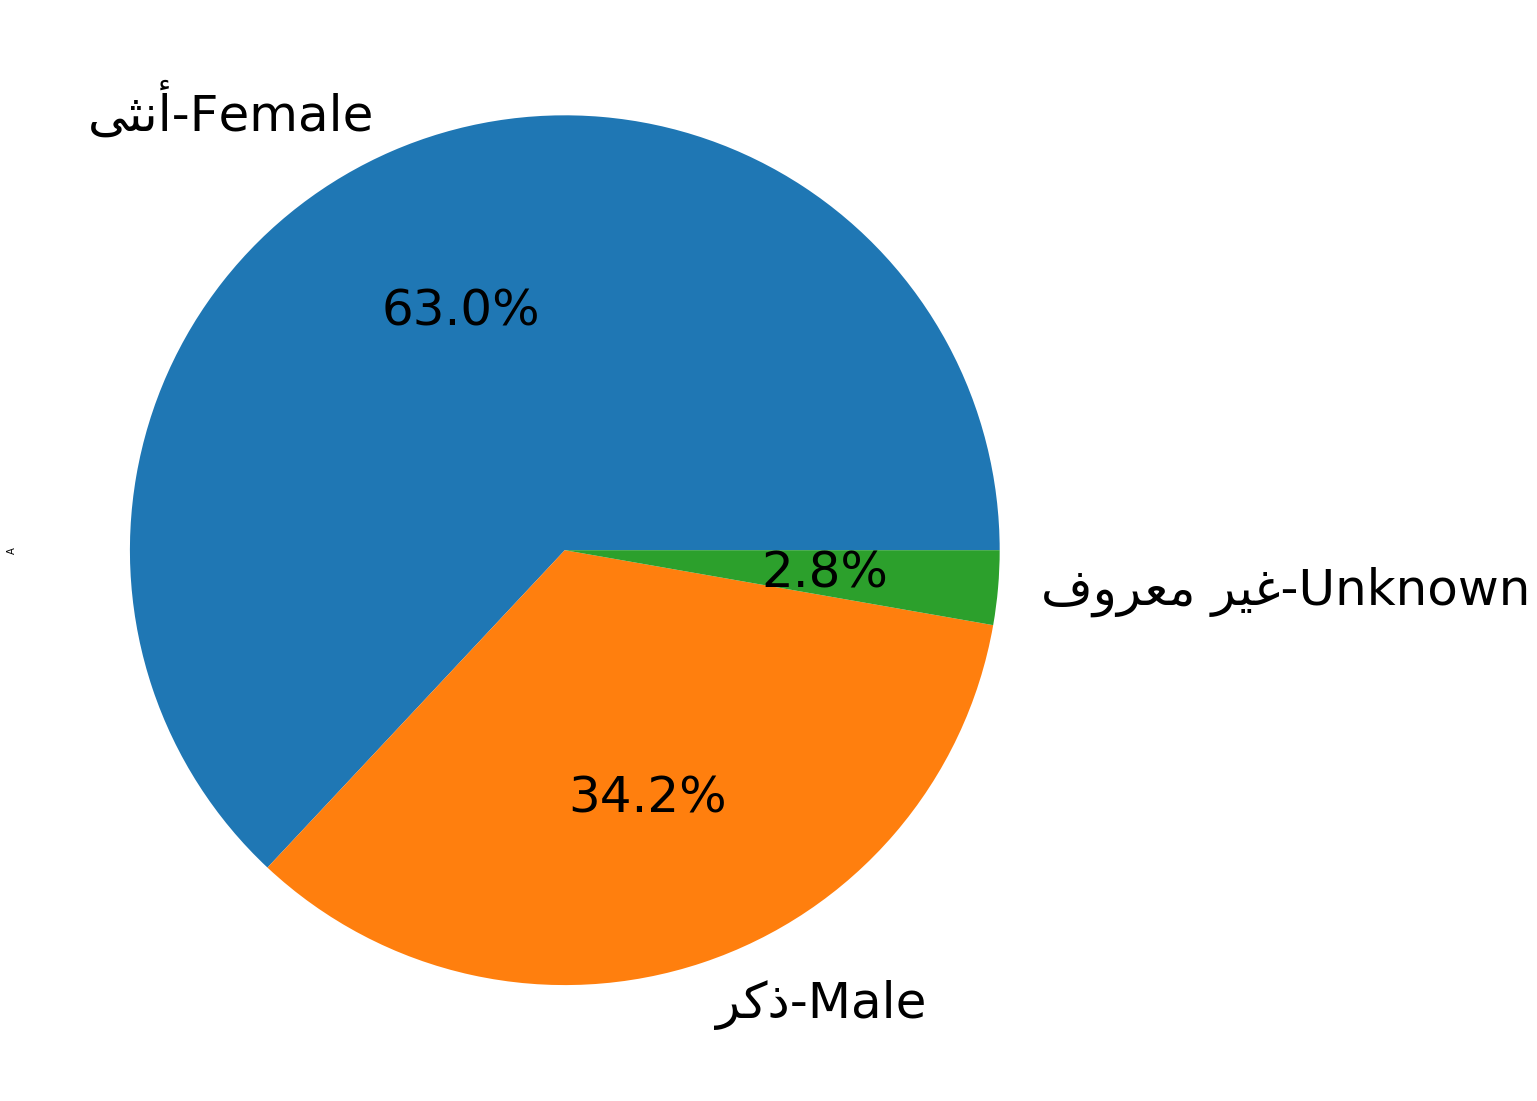

In [86]:
ax = (ty['A'].value_counts()*100.0 /len(ty['A']))\
.plot.pie(autopct='%.1f%%',labels = ['ﻰﺜﻧﺃ-Female', 'ﺮﻛﺫ-Male','ﻑﻭﺮﻌﻣ ﺮﻴﻏ-Unknown'],figsize =(20,20),fontsize=50) 

#graph polishing
#plt.title("the cancellation distribution",fontsize=20);
#plt.ylabel("cancelled",fontsize=20);
#plt.xlabel("cancelled",fontsize=20);
#plt.xticks(rotation=0,fontsize=20);


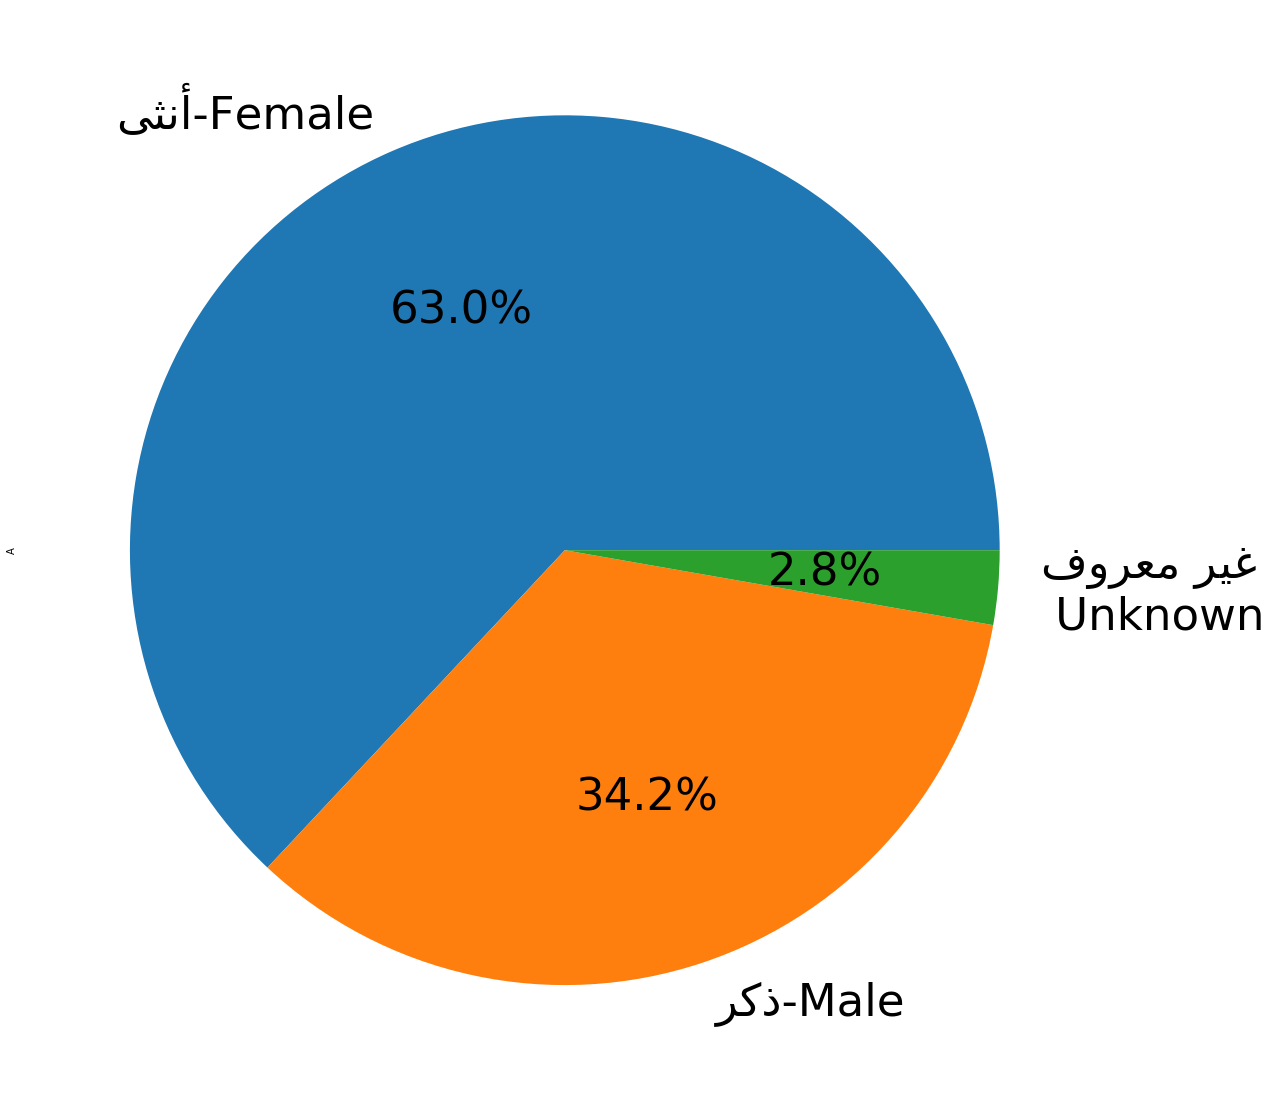

In [91]:
plot= (ty['A'].value_counts()*100.0 /len(ty['A']))\
.plot.pie(autopct='%.1f%%',labels = ['ﻰﺜﻧﺃ-Female', 'ﺮﻛﺫ-Male','ﻑﻭﺮﻌﻣ ﺮﻴﻏ \n Unknown'],figsize =(20,20),fontsize=45) 
  
fig = plot.get_figure()
fig.savefig("D:\output.png")